<a href="https://colab.research.google.com/github/rtosta/python_analise_dados/blob/main/notebooks/An%C3%A1lise_dados_5_keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buscar palavras-chaves

In [1]:
import numpy as np
import pandas as pd

In [2]:
csv = "https://raw.githubusercontent.com/rtosta/python_analise_dados/main/contexto_inter.csv"
contexto=pd.read_csv(csv)
contexto

,AU,OG,TI,AB,DE,CR,BP_EP,PY,IS,LA,DI,SO,SN,URL,PDFURL,loc_arquivo,size
0,Eugênio Vargas Garcia,NaN,Estados Unidos e Grã-Bretanha no Brasil: trans...,"Com enfoque sobretudo na década de 20, este ar...",Brazil-United States; Brazil-Britain; Transiti...,"ABREU, Marcelo de Paiva. (1973), ""The Niemeyer...",NaN,2002.0,v. 24 n. 1 (2002),pt,10.1590/S0102-85292002000100001,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/cMTYLM3xwfzKNT4q...,https://www.scielo.br/j/cint/a/cMTYLM3xwfzKNT4...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,139729
1,Juan Gabriel Tokatlian,NaN,"Colômbia: mais insegurança humana, menos segur...",No contexto da grave crise que atravessa a reg...,Andes Region; Human Insecurity; US Interventio...,"DORF, Robert H. (1996), ""Democratization and F...",129-166,2002.0,v. 24 n. 1 (2002),pt,10.1590/S0102-85292002000100002,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/z8kxTngCqVMZD65G...,https://www.scielo.br/j/cint/a/z8kxTngCqVMZD65...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,154457
2,Maria Guadalupe Moog Rodrigues,NaN,Redes transnacionais de advocacia pública: est...,"O projeto Planafloro, financiado pelo Banco Mu...",Inspection Panel; World Bank; Transnational Ne...,"BROWDER, John. (1998), Report - World Bank Mid...",NaN,2002.0,v. 24 n. 1 (2002),pt,10.1590/S0102-85292002000100003,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/46s45RBfLWLqwZx9...,https://www.scielo.br/j/cint/a/46s45RBfLWLqwZx...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,206246
3,Mark Everingham,NaN,Direitos de propriedade e cidadania em socieda...,Este estudo mostra como as disputas de terra d...,Property Rights; Conflict Resolution; Citizens...,"ADAMS, Martin, SIBANDA, Sipho e THOMAS, Glen. ...",NaN,2002.0,v. 24 n. 1 (2002),pt,10.1590/S0102-85292002000100004,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/7pRZMvTywYzZXDfJ...,https://www.scielo.br/j/cint/a/7pRZMvTywYzZXDf...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,147182
4,Mônica Herz,NaN,O Crescimento da área de relações internaciona...,O artigo analisa a produção acadêmica brasilei...,International Relations Theory; International ...,"ABREU, Marcelo de Paiva. (1984), ""O Brasil e a...",NaN,2002.0,v. 24 n. 1 (2002),pt,10.1590/S0102-85292002000100005,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/dTq3jbQQtT7DgRDj...,https://www.scielo.br/j/cint/a/dTq3jbQQtT7DgRD...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,157795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Leandro Wolpert dos Santos;André Pimentel Ferr...,Institute of Social and Political Studies of t...,Explaining the Changes in Brazilian Foreign Po...,AbstractThe administration of President Michel...,foreign policy change; Brazilian foreign polic...,"Almeida, P R de. 2003. ‘A Política Internacion...",489-513,2021.0,v. 43 n. 3 (2021),en,10.1590/S0102-8529.2019430300003,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/7gnzcsdC6C3mcsm3...,https://www.scielo.br/j/cint/a/7gnzcsdC6C3mcsm...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,1702907
420,Cairo Gabriel Borges Junqueira,Federal University of Sergipe (UFS),From Municipalist Activism to Institutional Ch...,AbstractMercosur has gone through distinct pha...,Mercosur; Mercocities; FCCR; subnational gover...,"Aalberts, T. 2005. ‘Sovereignty Reloaded? A Co...",515-540,2021.0,v. 43 n. 3 (2021),en,10.1590/S0102-8529.2019430300004,Contexto Internacional,1982-0240,http://www.scielo.br/j/cint/a/vqh4SkKwm4DknmfQ...,https://www.scielo.br/j/cint/a/vqh4SkKwm4Dknmf...,/media/hdvm09/bd/007/002/002/003/contexto_inte...,2147350
421,Virginia Soledad Busilli;María Belén Jaime,Scientific and Technological Center of the Nat...,Chinese Investments in Brazil: Economic Diplom...,AbstractThe People’s Republic of China has con...,"Latin America, China, economic diplomacy, FDI,...","Abeliansky, A. L and I Martínez-Zarzoso. 2019....",541-564,2021.0,v. 43 n. 3 (202

In [3]:
keyword_titulo = contexto ["TI"].str.contains ("Brasil")
keyword_titulo

0       True
1      False
2      False
3      False
4       True
       ...  
419    False
420    False
421    False
422    False
423    False
Name: TI, Length: 424, dtype: bool

In [4]:
keyword_titulo2 = contexto [contexto["TI"].str.contains ("Brasil", case=False)]
keyword_titulo2.shape

(47, 17)

# Busca genérica por palavras-chaves


*   A busca apresentada nesse tópico retorna resultados que incluem os caracteres da palavra "Brasil", incluindo os gentílicos, como"Brasileiro", e outros termos compostos



In [5]:
keyword_titulo = contexto["TI"].str.contains("Brasil")
keyword_titulo

0       True
1      False
2      False
3      False
4       True
       ...  
419    False
420    False
421    False
422    False
423    False
Name: TI, Length: 424, dtype: bool

In [6]:
keyword_titulo2 = contexto[contexto["TI"].str.contains("Brasil",case=False)]
keyword_titulo2.shape

(47, 17)

In [7]:
agrupar = keyword_titulo2["TI"].groupby(keyword_titulo2["PY"])
busca_ano = agrupar.count()
busca_ano

PY
2002.0    3
2003.0    2
2004.0    4
2005.0    2
2006.0    3
2007.0    3
2008.0    3
2009.0    4
2010.0    5
2011.0    5
2012.0    3
2013.0    3
2014.0    3
2015.0    2
2017.0    1
2018.0    1
Name: TI, dtype: int64

<Axes: xlabel='PY'>

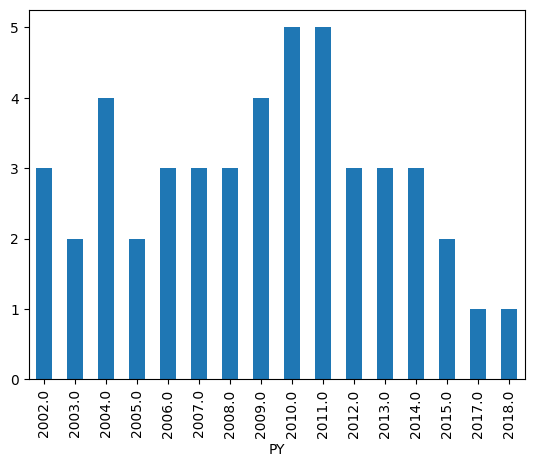

In [8]:
busca_ano.plot(kind="bar")

<Axes: xlabel='PY'>

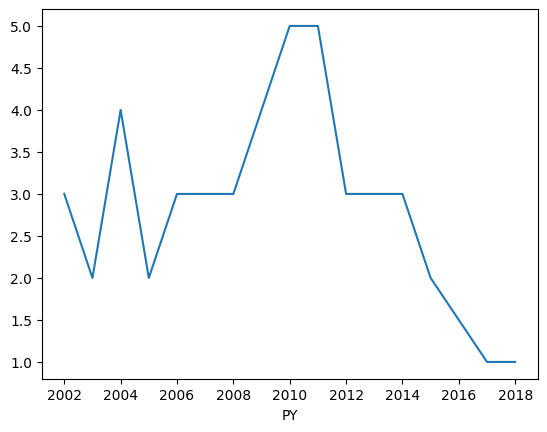

In [9]:
busca_ano.plot(kind="line")

# Busca recisa por palavras-chaves

* A busca apresentada nesse tópico retorna resultados precisos das ocorrências da palavra-chave "Brasil"   



In [10]:
df = pd.DataFrame({
    "nomes": ["João Lucas","Rafael Augusto","Ana Beatriz", "João Luca"]
})

df

,nomes
0,João Lucas
1,Rafael Augusto
2,Ana Beatriz
3,João Luca


In [11]:
busca_generica = df[df["nomes"].str.contains("a")]
busca_generica

,nomes
0,João Lucas
1,Rafael Augusto
2,Ana Beatriz
3,João Luca


In [12]:
busca_exata = df[df["nomes"].str.match("^João Lucas$")]
busca_exata

,nomes
0,João Lucas


In [13]:
keyword_titulo2 = contexto[contexto["TI"].str.match("^Brasil$")]
keyword_titulo2.shape

(0, 17)

In [14]:
busca_exata2 = "Política externa"
expressao_regular = r"\b{}\b".format(busca_exata2.replace(" ",r"\s+"))
busca_titulo3 = contexto[contexto["TI"].str.contains(expressao_regular, case=False)]
busca_titulo3.shape

(18, 17)

# Busca


*   in >> busca na lista de rótulos de linhas e colunas
*   isin >> busca valores armazenados em determinada coluna tanto o in quanto o isin vai retornar um true ou false
*   link com as nomenclaturas >> https://labriunesp.org/docs/projetos/dados/frjournalsbr/infos/metadados



In [15]:
busca = "AU" in contexto
busca

True

In [16]:
busca2 = contexto["AU"].isin(["João Fernando Finazzi"])
busca2

0      False
1      False
2      False
3      False
4      False
       ...  
419    False
420    False
421    False
422    False
423     True
Name: AU, Length: 424, dtype: bool